# Preprocessing & Exploring the Dataset

This dataset is the CMU Book Summaries dataset from Kaggle: https://www.kaggle.com/datasets/ymaricar/cmu-book-summary-dataset. It contains 16,559 books extracted from Wikipedia.

#### Exploring the original data

In [1]:
import pandas as pd

# read the file and show first few rows
filename = 'data/booksummaries.txt'
df = pd.read_csv(filename, sep="\t", 
                 names=['Wikipedia ID', 'Freebase ID', 'Title', 'Author', 'Publication Date', 'Genres', 'Summary'])
df.head()

,Wikipedia ID,Freebase ID,Title,Author,Publication Date,Genres,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [2]:
# get dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Wikipedia ID      16559 non-null  int64 
 1   Freebase ID       16559 non-null  object
 2   Title             16559 non-null  object
 3   Author            14177 non-null  object
 4   Publication Date  10949 non-null  object
 5   Genres            12841 non-null  object
 6   Summary           16559 non-null  object
dtypes: int64(1), object(6)
memory usage: 905.7+ KB


In [3]:
# get count of genre grouping
df['Genres'].value_counts()

{"/m/05hgj": "Novel"}                                                                                                                                                  839
{"/m/06n90": "Science Fiction", "/m/014dfn": "Speculative fiction"}                                                                                                    567
{"/m/06n90": "Science Fiction"}                                                                                                                                        526
{"/m/02xlf": "Fiction"}                                                                                                                                                402
{"/m/02xlf": "Fiction", "/m/05hgj": "Novel"}                                                                                                                           381
                                                                                                                                                 

In [4]:
# inspect a few rows of data with truncated summaries
print("Title: {} \nGenres: {} \nSummary: {}...".format(df.Title[0], df.Genres[0], df.Summary[0][:200]))
print()
print("Title: {} \nGenres: {} \nSummary: {}...".format(df.Title[3], df.Genres[3], df.Summary[3][:200]))

Title: Animal Farm 
Genres: {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children's literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"} 
Summary:  Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. Wh...

Title: An Enquiry Concerning Human Understanding 
Genres: nan 
Summary:  The argument of the Enquiry proceeds by a series of incremental steps, separated into chapters which logically succeed one another. After expounding his epistemology, Hume explains how to apply his p...


**Insights:** We can see that some rows do not have any genres and those who do, have them in a dictionary with some sort of ID key. The summary and title don't have any extra characters or whitespace, so most the the data cleanup and considerations are with the genres. 

#### Preprocessing the Data

We need to clean the data, so that we can apply vectorizing operations to the book summaries. Cleaning involves getting rid of stop words and punctuation.

In [5]:
# clean the punctuation and capitalization
import re

def clean(text):
    cleaned_text = ""
    punc_less_text = re.sub(r'[^\w\s]', '', text)
    alpha_only_text = re.sub(r'[^a-zA-Z]',' ',punc_less_text)
    cleaned_text = ' '.join(alpha_only_text.split())
    return cleaned_text.lower()

# apply to dataframe col that contains the book summary
df['CleanSummary'] = df['Summary'].apply(lambda s: clean(s))
df.head(5)

,Wikipedia ID,Freebase ID,Title,Author,Publication Date,Genres,Summary,CleanSummary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...",old major the old boar on the manor farm calls...
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...",alex a teenager living in nearfuture england l...
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,the text of the plague is divided into five pa...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,the argument of the enquiry proceeds by a seri...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,the novel posits that space around the milky w...


In [6]:
# remove stop words
import nltk
from nltk.corpus import stopwords

# download stopwords list
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  stop_less = ' '.join([word for word in text.split() if word not in (stop_words)])
  return stop_less

# apply stopword removal to dataframe col that contains the book summary
df['CleanSummary'] = df['CleanSummary'].apply(lambda s: remove_stopwords(s))
df.head(5)

,Wikipedia ID,Freebase ID,Title,Author,Publication Date,Genres,Summary,CleanSummary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...",old major old boar manor farm calls animals fa...
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...",alex teenager living nearfuture england leads ...
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,text plague divided five parts town oran thous...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,argument enquiry proceeds series incremental s...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,novel posits space around milky way divided co...


#### Cleaning Genres and Consolidation

Because our dataset has the genres of each book as key:value pairs, we will extract each of these genres into a cleaned list. Furthermore, because there are 2154 different permutations of each genre, we will try to consolidate similar genres to make it easier for classification.

In [7]:
import json
# drop empty genres and summaries 
# TODO: expand such that we keep these dropped genres for later
df = df.dropna(subset=['Genres', 'Summary'])

# get genres into a list
df['Genres'] = df['Genres'].map(lambda genre : list(json.loads(str(genre)).values()))
df.head(5)

,Wikipedia ID,Freebase ID,Title,Author,Publication Date,Genres,Summary,CleanSummary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca...",old major old boar manor farm calls animals fa...
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...",alex teenager living nearfuture england leads ...
2,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,text plague divided five parts town oran thous...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...,novel posits space around milky way divided co...
5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...",book tells story paul b umer german soldier wh...


Let's see what the counts of these genres look like. We will do the top 50 genres since there are 2145 unique genres in our dataset, so visualizing the top 50 will give us a good sense of how the genres are distributed.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def get_counts(df):
    genre_counts = dict()
    for genre in df['Genres'].map(str):
        if genre in genre_counts.keys():
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

    return pd.DataFrame({"Genre": list(genre_counts.keys()),
                    "Counts": list(genre_counts.values())})

def plot_counts(df, pathname):    
    g_df = get_counts(df)
    genres = g_df.nlargest(columns=["Counts"], n=50)
    plt.figure(figsize=(15,10)) 
    ax = sns.barplot(data=genres, x= "Counts", y = "Genre") 
    ax.set(xlabel = 'Counts', ylabel = 'Top 50 Genres')
    plt.title('Counts per Genre for the Top 50 Genres')
    plt.savefig(f'data/{pathname}.png',bbox_inches="tight")
    plt.show()

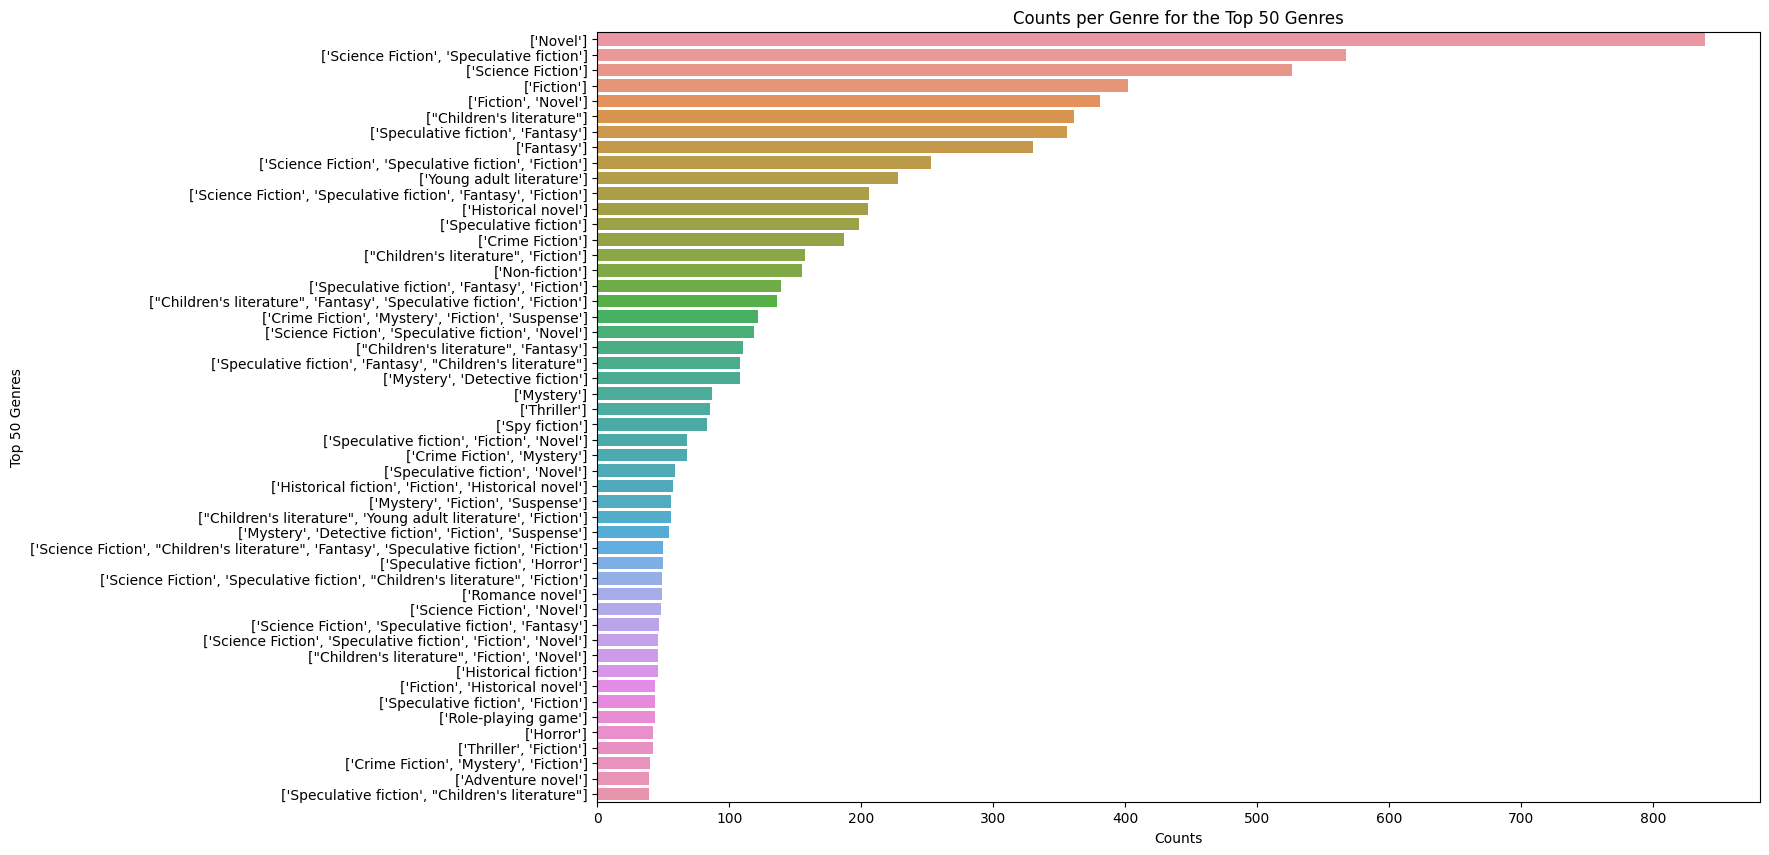

In [16]:
plot_counts(df, 'multilabeltop50genres')

To make classification easier for our model, we choose to keep the single most relevant genre for each book summary as these book genres are sorted by most prominent. We can also display histogram for this.  

In [17]:
from collections import Counter

# generates the total count for each genre
def num_genres(df):
    genres_list = [x for n in df.Genres for x in n]  # all genres into one list
    genres_count = Counter(genres_list)  # we can use counter here instead of the method above b/c list is iterable
    genres_df = pd.DataFrame({"Genre": list(genres_count.keys()),
                   "Counts": list(genres_count.values())})
    return genres_df

# uses the total count for each genre to return the top n genres
def top_n_genres(counts_df, n):
    top_genres = counts_df.nlargest(columns=["Counts"], n=n)
    return top_genres.Genre

# removes genres not in the top genres (in our case, not in the top 50 genres)
def remove_unpopular_genres(df, top_genres):
    new_df = df[df['Genres'].isin(top_genres)]
    return new_df

top_genres = list(top_n_genres(num_genres(df), 50))
genres_df=df.explode("Genres")  # creates a separate row for each genre in the list of genres for each row
df = remove_unpopular_genres(genres_df, top_genres)

# remove repeated df values, keep only the top genre
df = df.drop_duplicates(subset=['Wikipedia ID'])
df.head(5)

,Wikipedia ID,Freebase ID,Title,Author,Publication Date,Genres,Summary,CleanSummary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,Satire,"Old Major, the old boar on the Manor Farm, ca...",old major old boar manor farm calls animals fa...
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,Science Fiction,"Alex, a teenager living in near-future Englan...",alex teenager living nearfuture england leads ...
2,986,/m/0ldx,The Plague,Albert Camus,1947,Fiction,The text of The Plague is divided into five p...,text plague divided five parts town oran thous...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,Science Fiction,The novel posits that space around the Milky ...,novel posits space around milky way divided co...
5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,War novel,"The book tells the story of Paul Bäumer, a Ge...",book tells story paul b umer german soldier wh...


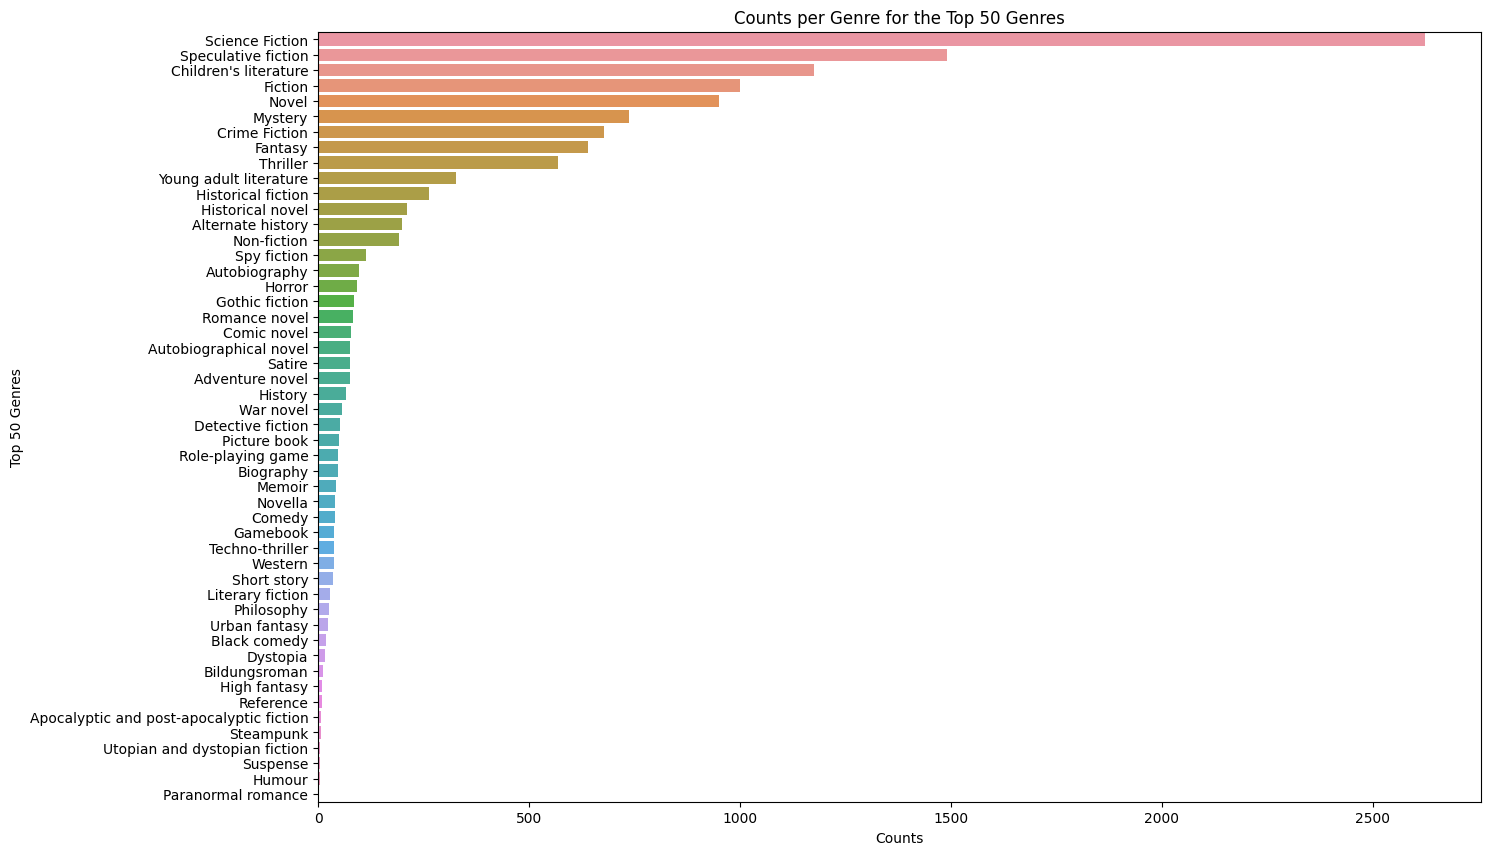

In [18]:
# plot counts for top 50 singular genres
plot_counts(df, 'top50genres')

#### Saving the data

Because our baseline models and our final transformer model will be using different tokenizing and feature extraction methods, we will handle those in the specific model notebooks. For now, we will save the Dataframes into CSV files for easy loading!

In [25]:
# full dataset
compression_opts = dict(method='zip', archive_name='cleaned_data.csv')
df.to_csv('data/cleaned_data.zip', compression=compression_opts)

In [ ]:
# split data into train and test data
from sklearn.model_selection import train_test_split

# split the data into training and test data: 80:20
train_data, test_data = train_test_split(df, test_size=.2, random_state=8)

# training data
compression_opts = dict(method='zip', archive_name='train_data.csv')  
train_data.to_csv('data/train_data.zip', compression=compression_opts)

# test data
compression_opts = dict(method='zip', archive_name='test_data.csv')  
test_data.to_csv('data/test_data.zip', compression=compression_opts)